# importando a base de dados e os pacotes necessarios

In [167]:
print('ola,mundi')

ola,mundi


In [168]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('diabete.csv')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

### Traduzinfo a base de dados 

In [169]:
df.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [170]:
df_traduzida = df.rename(columns={'gender':'Sexo','age':'Idade','hypertension':'hipertensão','heart_disease':'doença_cardíaca','smoking_history':'histórico_tabagismo','blood_glucose_level':'glicose'})
df_traduzida.head()

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [171]:
df_traduzida.shape  

(100000, 9)

# ANÁLISE DE DADOS 

In [172]:
df_traduzida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Sexo                 100000 non-null  object 
 1   Idade                100000 non-null  float64
 2   hipertensão          100000 non-null  int64  
 3   doença_cardíaca      100000 non-null  int64  
 4   histórico_tabagismo  100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   glicose              100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [173]:
df_traduzida.describe()

,Idade,hipertensão,doença_cardíaca,bmi,HbA1c_level,glicose,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [174]:
df_traduzida.groupby(['Sexo']).size()

Sexo
Female    58552
Male      41430
Other        18
dtype: int64

In [175]:
df_traduzida.groupby(['hipertensão']).size()

hipertensão
0    92515
1     7485
dtype: int64

In [176]:
df_traduzida.groupby(['doença_cardíaca']).size()

doença_cardíaca
0    96058
1     3942
dtype: int64

In [177]:
df_traduzida.groupby(['histórico_tabagismo']).size()

histórico_tabagismo
No Info        35816
current         9286
ever            4004
former          9352
never          35095
not current     6447
dtype: int64

In [178]:
df_traduzida.groupby(['diabetes']).size()

diabetes
0    91500
1     8500
dtype: int64

In [179]:
df_traduzida.groupby(['HbA1c_level']).size()

HbA1c_level
3.5    7662
4.0    7542
4.5    7585
4.8    7597
5.0    7471
5.7    8413
5.8    8321
6.0    8295
6.1    8048
6.2    8269
6.5    8362
6.6    8540
6.8     642
7.0     634
7.5     643
8.2     661
8.8     661
9.0     654
dtype: int64

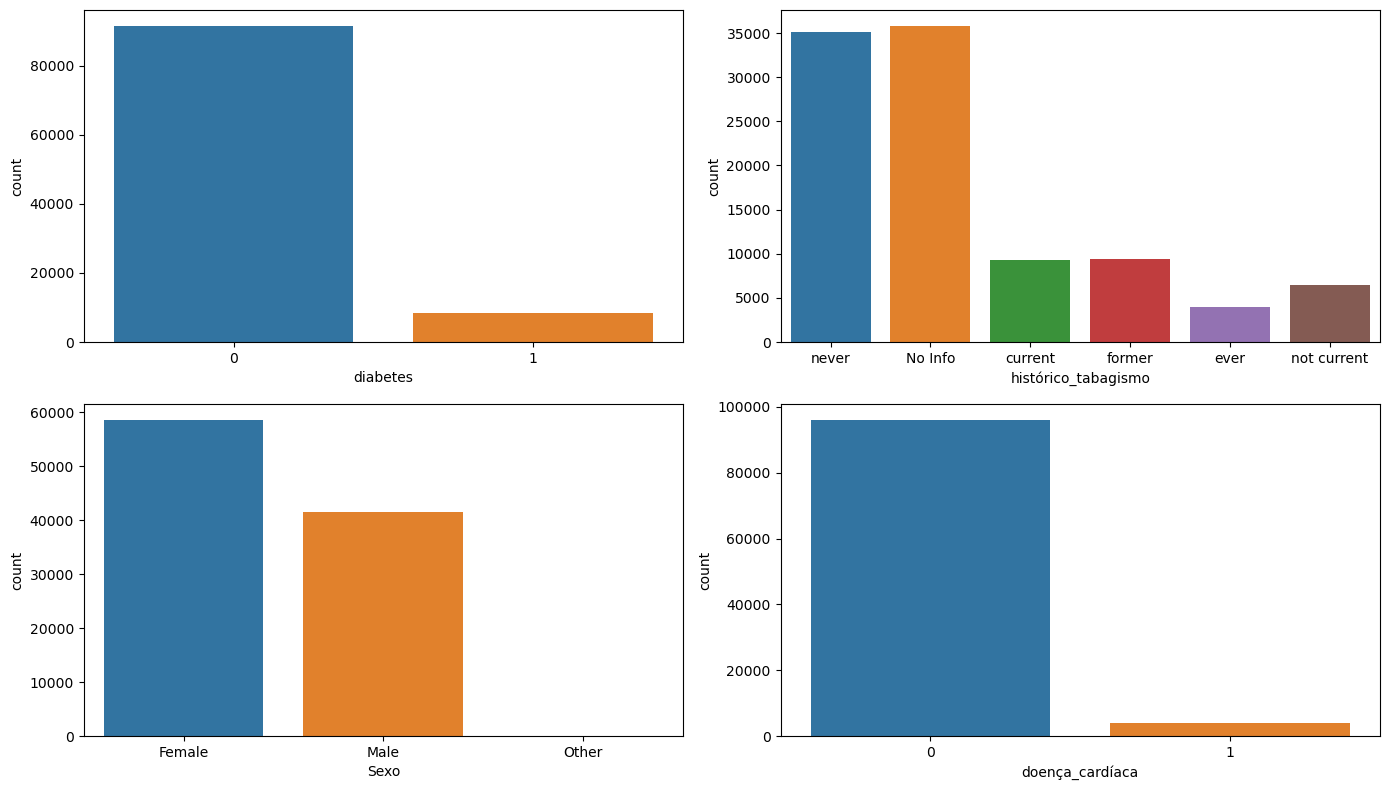

In [180]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="diabetes", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="histórico_tabagismo", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="Sexo", ax=axes[1][0])
sns.countplot(data = df_traduzida, x="doença_cardíaca", ax=axes[1][1])
plt.show()

### Verificando se há alguma correlação entre as variaveis

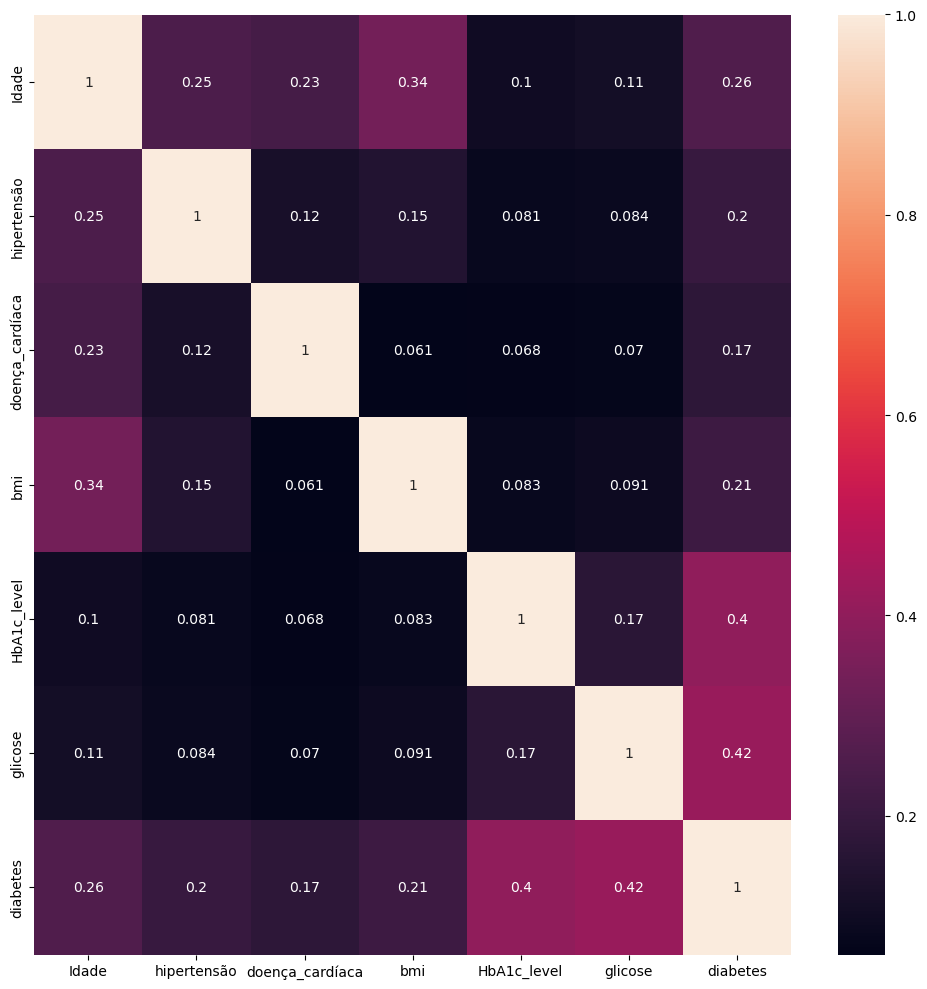

In [181]:
# A correção é utilizada para entender como as variaveis se relacionam entre si.
# A correção vai de -1 até +1 onde -1 significa uma forte correção negativa e +1 significa uma forte correlação positiva.
# Correlação NÃO é causalidade, ou seja, uma relação entre as variaveis não significa que uma é a causa do valor da outra.


plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df_traduzida.corr(), annot=True)
plt.show()

# verificando se há outliers

Idade : float64
hipertensão : int64
doença_cardíaca : int64
bmi : float64
HbA1c_level : float64
glicose : int64
diabetes : int64


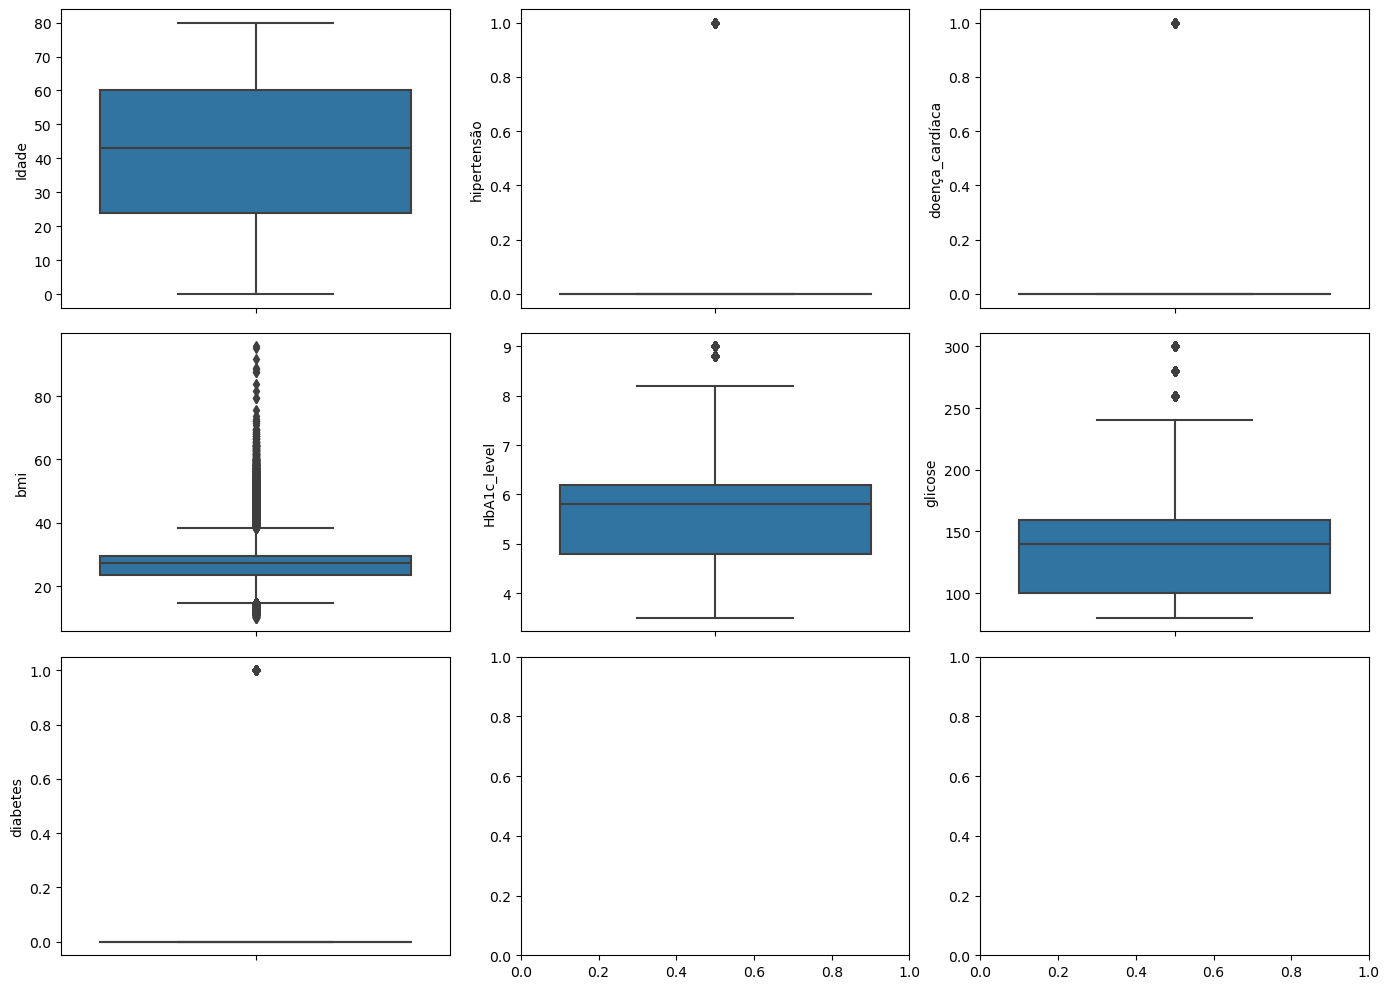

In [182]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

In [183]:
df_traduzida['Idade'].value_counts()

80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
49.00    1541
52.00    1534
46.00    1522
57.00    1521
54.00    1506
55.00    1504
38.00    1498
62.00    1474
45.00    1469
50.00    1455
43.00    1440
56.00    1435
60.00    1423
39.00    1422
61.00    1403
44.00    1402
59.00    1399
42.00    1395
40.00    1385
28.00    1377
29.00    1359
58.00    1348
37.00    1322
41.00    1299
30.00    1298
27.00    1292
31.00    1276
26.00    1273
19.00    1268
34.00    1262
36.00    1257
21.00    1255
23.00    1253
25.00    1249
33.00    1245
32.00    1244
22.00    1237
20.00    1236
24.00    1236
35.00    1228
2.00     1186
18.00    1181
66.00    1176
65.00    1134
64.00    1098
63.00    1089
67.00    1040
3.00     1038
16.00    1022
17.00    1018
5.00      993
68.00     977
15.00     968
69.00     966
4.00      953
13.00     949
6.00      931
70.00     919
14.00     906
7.00      903
12.00     891
8.00      876
71.00     871
10.00     860
11.00     843
73.00     823
72.00 

In [184]:
df_traduzida = df_traduzida.drop_duplicates()

### Avaliando as pessoas que foram diagnosticadas com diabetes 

In [185]:
diabetes = df_traduzida.loc[df_traduzida['diabetes'] == 1]
diabetes.head()

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1


### Avaliando as pessoas que não foram diagnosticadas com diabetes 

In [186]:
not_diabetes = df_traduzida.loc[df_traduzida['diabetes'] == 0]
diabetes.head()

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1


In [187]:
df_traduzida = df_traduzida.drop_duplicates()

# MACHINE LEARNING

### PRÉ-PROCESSAMENTO DOS DADOS 

In [188]:
df_traduzida.head(1)

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [189]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_traduzida['histórico_tabagismo'] = lb.fit_transform(df_traduzida['histórico_tabagismo'])
df_traduzida['Sexo'] = lb.fit_transform(df_traduzida['Sexo'])

# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

In [190]:
df_traduzida.head(1)

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0


In [191]:
# Separando a variavel alvo
#target = df_traduzida.iloc[:,8]

In [192]:
# Separando as variaveis preditoras

#preditoras = df_traduzida.copy() #Fazendo uma cópia do dataframe

#del preditoras['diabetes'] #Excluindo a variavel target, pois já separamos ela na etapa anterior

#preditoras.head()#Visualizando as variaveis preditoras

### Balanceamento da variavel target 

In [193]:
# Importa a função
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Separa X e y
X = df_traduzida.iloc[:, :-1]
y = df_traduzida.iloc[:, -1]

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

In [194]:
X.head(1)

,Sexo,Idade,hipertensão,doença_cardíaca,histórico_tabagismo,bmi,HbA1c_level,glicose
0,0,80.0,0,1,4,25.19,6.6,140


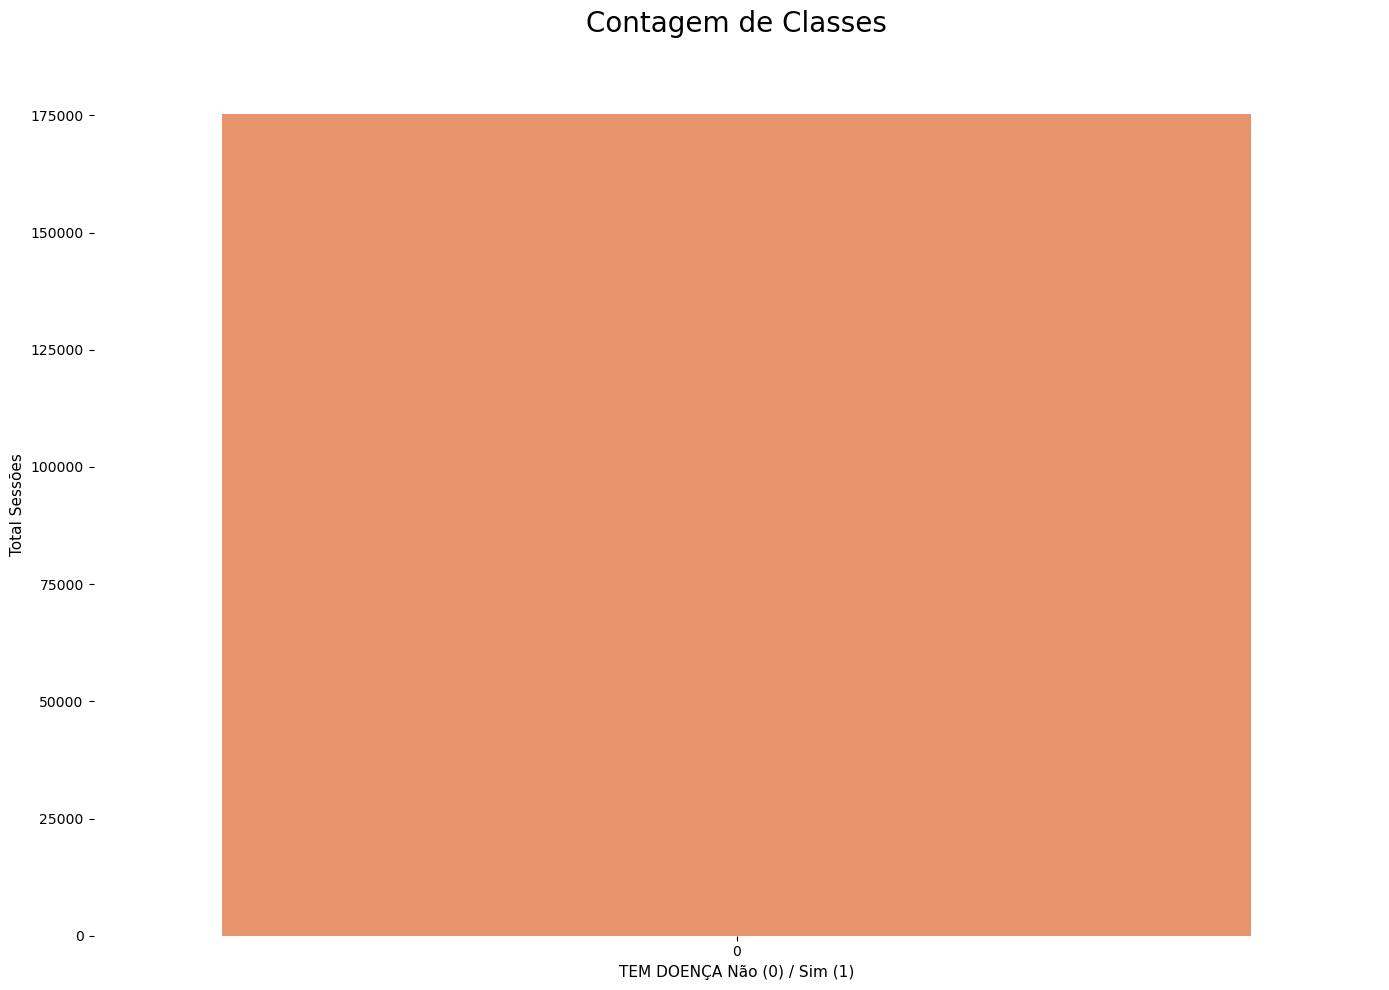

In [195]:
# Plot 
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('TEM DOENÇA Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [196]:
df_traduzida.shape  

(96146, 9)

# RandomForest

In [197]:
#Random Forest Regressor:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier = RandomForestClassifier.fit(X_treino, y_treino)

#Prediction:
y_predii = RandomForestClassifier.predict(X_teste)

#Scores:
print(r2_score(y_testee, y_predii))
print(mean_squared_error(y_testee, y_predii))

0.5992918204474217
0.03214724699801443


In [198]:
# Construtor do Modelo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
modelo1 = RandomForestClassifier

In [199]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Valores para o grid de hiperparâmetros
n_estimators = np.array([100, 150, 300])
max_depth = np.array([10, 20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2"])
min_samples_split = np.array([1, 2])
min_samples_leaf = np.array([1, 2])
bootstrap = [True, False]  # Corrigido aqui

# Numero de iterações do RandomizedSearch
iteracoes = 50

# Grid de hiperparâmetros
grid_parametros = dict(n_estimators=n_estimators,
                       max_depth=max_depth,
                       criterion=criterion,
                       max_features=max_features,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       bootstrap=bootstrap)

# Criando o modelo com o Grid de Hiperparâmetros
modelo2 = RandomForestClassifier()  # Você deve criar uma instância do modelo primeiro

modelo2 = RandomizedSearchCV(modelo2, grid_parametros, cv=3, n_jobs=8, n_iter=iteracoes)

# Treinando os modelos
modelo2.fit(X_treino, y_treino)

# Obtendo e visualizando os parâmetros treinados
treinos_rf = pd.DataFrame(modelo2.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo2.best_score_:.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo2.best_params_}")
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])

Acurácia em Treinamento: 97.15%

Hiperparâmetros Ideais: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}

Numero de treinamentos realizados:  50


In [200]:
# Os valores a seguir são apenas exemplos, substitua-os pelos valores reais
Sexo = 0  # Exemplo: 0 para masculino, 1 para feminino
Idade = 40
hipertensão = 1  # 1 se tiver hipertensão, 0 caso contrário
doença_cardíaca = 0  # 1 se tiver doença cardíaca, 0 caso contrário
histórico_tabagismo = 1  # 1 se tiver histórico de tabagismo, 0 caso contrário
bmi = 25.0
HbA1c_level = 6.0
glicose = 321

# Crie um array numpy com os valores dos parâmetros
parametro = np.array([[Sexo, Idade, hipertensão, doença_cardíaca, histórico_tabagismo, bmi, HbA1c_level, glicose]])

# Agora tente fazer a previsão usando o modelo
fazendo_previsao = modelo1.predict(parametro)
probabilidade = modelo1.predict_proba(parametro)

# Agora você pode imprimir os resultados

if (fazendo_previsao == 0).any():
    print('NÃO TEM DIABETE ')
    print(probabilidade)

else:
    
    print('TEM DIABETE')
    print(probabilidade)

TEM DIABETE
[[0.09 0.91]]


### SALVAR O MODELO PARA POR EM PRODUÇÃO

In [201]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva_diabete3.pkl", mode = "wb") 
pickle.dump(modelo1, pickle_out) 
pickle_out.close() 